In [5]:
import os
import json
import numpy as np
import mlflow
from mlflow import MlflowClient
from mlflow.entities import ViewType
from itertools import product
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# %matplotlib widget
%matplotlib inline

In [6]:
tracking_uri = '/home/nazya/mlruns/'
experiment_name = os.path.basename(os.getcwd())

In [7]:
del mcolors.TABLEAU_COLORS['tab:pink']
colors = list(mcolors.TABLEAU_COLORS.keys())
markers = ['o', '<', '>', 'v', 's', 'D', '*']

KeyError: 'tab:pink'

In [8]:
label_key = 'optimizer'
metric_key = 'dist'

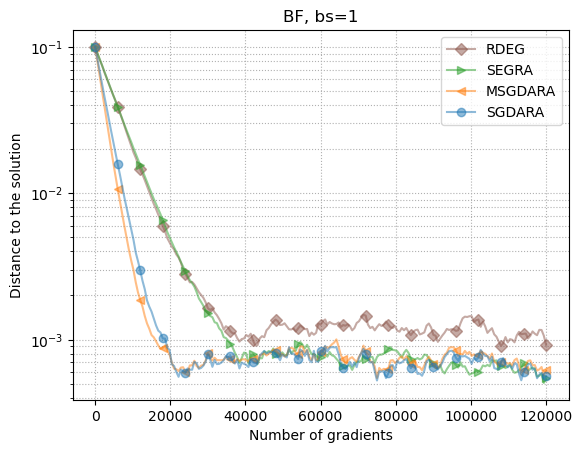

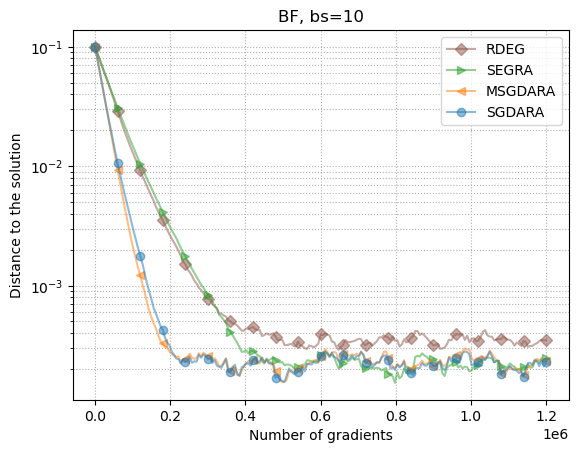

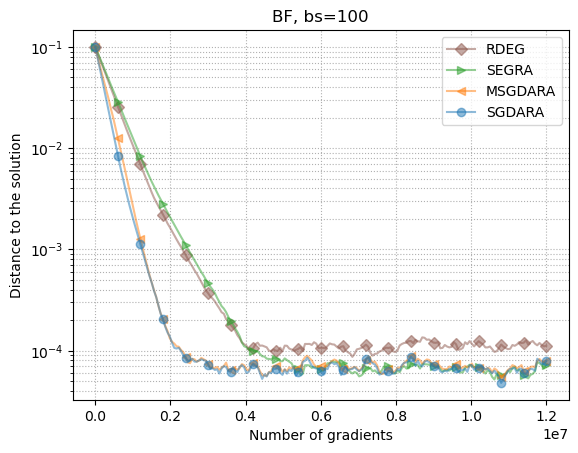

In [21]:
client = MlflowClient(tracking_uri=tracking_uri)
e = client.get_experiment_by_name(experiment_name)
runs = client.search_runs(experiment_ids=[e.experiment_id],
                          filter_string='',
                          run_view_type=ViewType.ACTIVE_ONLY)

optimizer_names = ['SGDARA', 'MSGDARA', 'SEGRA', 'RDEG'] #'SGDA']
for an, bs in product(['BF'],
                          # [1e-1, 1., 1e1, 1e2],
                          [1, 10, 100]):
    for r in runs:
        config = mlflow.artifacts.load_dict(r.info.artifact_uri+'/config.json')
        
        if config['batch_size'] != bs:
            continue

        if config['attack']['name'] != an:
            continue
            
        if config['optimizer']['name'] not in optimizer_names:
            continue
        
        beg = 0
        end = 120000*bs

        label = config[label_key]['name']
        i = config[label_key]['id']
        history = client.get_metric_history(run_id=r.info.run_id, key=metric_key)
        y = np.array([h.value for h in history])
        x = np.array([h.timestamp for h in history])
        # x = np.array([h.step for h in history])
        mask = (x >= beg)*(x <= end)
        x, y = x[mask], y[mask]

        plt.plot(x, y,
                 alpha=0.5, color=colors[i],
                 marker=markers[i], markevery=10,
                 label=label)

    title = '%s, bs=%i' % (an, bs)
    plt.title(title)
    plt.xlabel('Number of gradients')
    plt.ylabel('Distance to the solution')
    plt.yscale('log')
    plt.xscale('linear')
    plt.grid(True, which="both", ls='dotted')
    plt.legend()
    plt.savefig('figures/base/'+title+'.pdf', bbox_inches='tight')
    plt.show()

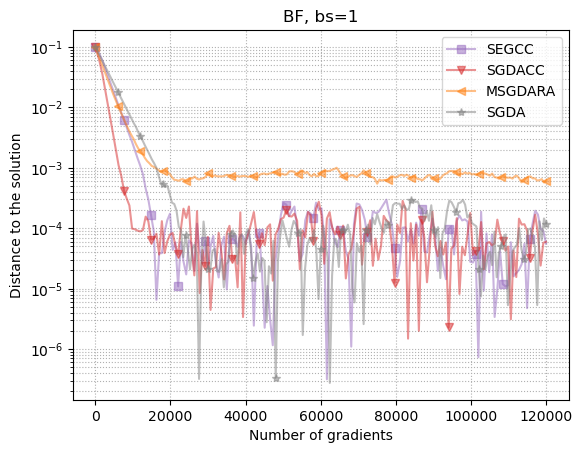

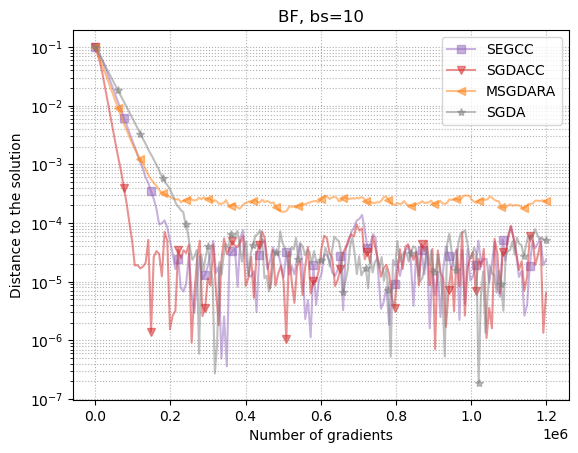

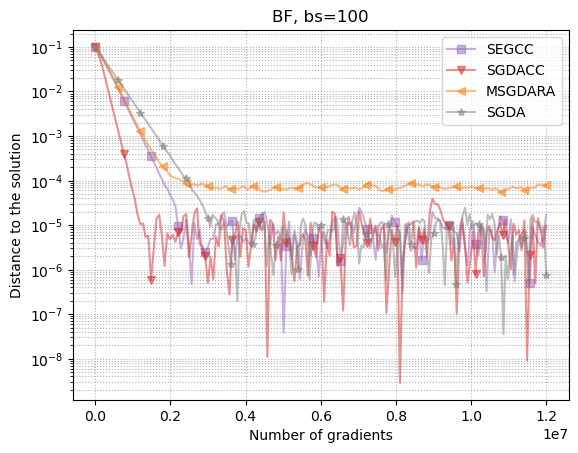

In [22]:
client = MlflowClient(tracking_uri=tracking_uri)
e = client.get_experiment_by_name(experiment_name)
runs = client.search_runs(experiment_ids=[e.experiment_id],
                          filter_string='',
                          run_view_type=ViewType.ACTIVE_ONLY)

optimizer_names = ['MSGDARA', 'SGDACC', 'SEGCC', 'SGDA']
for an, bs in product(['BF'],
                          # [1e-1, 1., 1e1, 1e2],
                          [1, 10, 100]):
    for r in runs:
        config = mlflow.artifacts.load_dict(r.info.artifact_uri+'/config.json')
        
        if config['batch_size'] != bs:
            continue

        if config['attack']['name'] != an:
            continue
            
        if config['optimizer']['name'] not in optimizer_names:
            continue
        
        beg = 0
        end = 120000*bs

        label = config[label_key]['name']
        i = config[label_key]['id']
        history = client.get_metric_history(run_id=r.info.run_id, key=metric_key)
        y = np.array([h.value for h in history])
        x = np.array([h.timestamp for h in history])
        # x = np.array([h.step for h in history])
        mask = (x >= beg)*(x <= end)
        x, y = x[mask], y[mask]

        plt.plot(x, y,
                 alpha=0.5, color=colors[i],
                 marker=markers[i], markevery=10,
                 label=label)

    title = '%s, bs=%i' % (an, bs)
    plt.title(title)
    plt.xlabel('Number of gradients')
    plt.ylabel('Distance to the solution')
    plt.yscale('log')
    plt.xscale('linear')
    plt.grid(True, which="both", ls='dotted')
    plt.legend()
    plt.savefig('figures/RAvsCC/'+title+'.pdf', bbox_inches='tight')
    plt.show()